<a href="https://colab.research.google.com/github/machiwao/CCADMACL_PROJECT_COM222/blob/executive/KMeans_CCADMACL_Project_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensinal Poverty Measures
Dataset Reference: https://www.kaggle.com/datasets/grosvenpaul/family-income-and-expenditure/data


In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

In [152]:
df = pd.read_csv('https://raw.githubusercontent.com/machiwao/CCADMACL_PROJECT_COM222/refs/heads/main/Family%20Income%20and%20Expenditure.csv')
print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns")

Dataset loaded with 41544 rows and 60 columns


#Data Exploration and Cleaning

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [154]:
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [155]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])


Missing values per column:
Household Head Occupation         7536
Household Head Class of Worker    7536
Toilet Facilities                 1580
dtype: int64


In [156]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicate rows removed. New shape: {df.shape}")


Number of duplicate rows: 0


In [157]:
# Basic statistics for numerical columns
print("\nBasic statistics for numerical columns:")
print(df.describe().T)


Basic statistics for numerical columns:
                                                 count           mean  \
Total Household Income                         41544.0  247555.584802   
Total Food Expenditure                         41544.0   85099.158194   
Agricultural Household indicator               41544.0       0.429858   
Bread and Cereals Expenditure                  41544.0   25133.723642   
Total Rice Expenditure                         41544.0   18195.825005   
Meat Expenditure                               41544.0   10540.072574   
Total Fish and  marine products Expenditure    41544.0   10529.318337   
Fruit Expenditure                              41544.0    2550.474990   
Vegetables Expenditure                         41544.0    5006.918568   
Restaurant and hotels Expenditure              41544.0   15436.566075   
Alcoholic Beverages Expenditure                41544.0    1085.068121   
Tobacco Expenditure                            41544.0    2294.736183   
Clothing, 

In [158]:
# Check for outliers in income and major expenditure columns
income_cols = ['Total Household Income', 'Total Income from Entrepreneurial Acitivites']
expenditure_cols = ['Total Food Expenditure', 'Housing and water Expenditure',
                    'Transportation Expenditure', 'Education Expenditure']

for col in income_cols + expenditure_cols:
    if col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        print(f"{col}: {outliers} outliers detected ({outliers/df.shape[0]:.2%} of data)")

Total Household Income: 3151 outliers detected (7.58% of data)
Total Income from Entrepreneurial Acitivites: 2660 outliers detected (6.40% of data)
Total Food Expenditure: 1849 outliers detected (4.45% of data)
Housing and water Expenditure: 2954 outliers detected (7.11% of data)
Transportation Expenditure: 3422 outliers detected (8.24% of data)
Education Expenditure: 7217 outliers detected (17.37% of data)


In [159]:
# Handle missing values
# For numerical columns, impute with median (more robust to outliers than mean)
# For categorical columns, impute with most frequent value
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

In [160]:
# Check if we've resolved missing values
missing_after = df.isnull().sum().sum()
print(f"Missing values after imputation: {missing_after}")

Missing values after imputation: 0


In [161]:
# For this analysis, we'll cap extreme outliers in income and expenditure
# This is preferable to removing them as they might represent important economic groups
for col in income_cols + expenditure_cols:
    if col in df.columns:
        q3 = df[col].quantile(0.75)
        iqr = q3 - df[col].quantile(0.25)
        upper_cap = q3 + 3 * iqr  # Less strict cap (3*IQR) to preserve some variability
        df[col] = df[col].clip(upper=upper_cap)

#Feature Selection and Engineering

In [162]:
# Calculate expenditure ratios (as % of total income)
if 'Total Household Income' in df.columns:
    expenditure_columns = [col for col in df.columns if 'Expenditure' in col]
    for col in expenditure_columns:
        ratio_col_name = f"{col.replace('Expenditure', 'Ratio')}"
        df[ratio_col_name] = (df[col] / df['Total Household Income'] * 100).clip(0, 100)

    # Create total expenditure to income ratio
    df['Total_Expenditure'] = df[[col for col in df.columns if 'Expenditure' in col]].sum(axis=1)
    df['Expenditure_to_Income_Ratio'] = (df['Total_Expenditure'] / df['Total Household Income'] * 100).clip(0, 200)

In [163]:
# Create household size features
if 'Total Number of Family members' in df.columns and 'Members with age less than 5 year old' in df.columns:
    df['Dependency_Ratio'] = df.apply(
        lambda x: ((x['Members with age less than 5 year old'] + x['Members with age 5 - 17 years old']) /
                   max(1, x['Total Number of Family members'] - (x['Members with age less than 5 year old'] + x['Members with age 5 - 17 years old']))),
        axis=1
    )

In [164]:
# Create asset index based on household appliances and vehicles
asset_columns = [col for col in df.columns if col.startswith('Number of ')]
if asset_columns:
    df['Asset_Index'] = df[asset_columns].sum(axis=1)

# Get features for clustering
# We'll focus on income, expenditure patterns, household demographics, and assets
# We'll drop highly correlated features and keep those most relevant to our research question

In [165]:
# First, let's identify key feature categories:
income_features = ['Total Household Income', 'Total Income from Entrepreneurial Acitivites']

expenditure_features = [
    'Total Food Expenditure', 'Housing and water Expenditure',
    'Education Expenditure', 'Medical Care Expenditure',
    'Transportation Expenditure', 'Communication Expenditure',
    'Restaurant and hotels Expenditure'
]

expenditure_ratio_features = [col for col in df.columns if 'Ratio' in col]

demographic_features = [
    'Household Head Age', 'Total Number of Family members',
    'Members with age less than 5 year old', 'Members with age 5 - 17 years old',
    'Total number of family members employed', 'Dependency_Ratio'
]

housing_features = [
    'House Floor Area', 'House Age', 'Number of bedrooms'
]

asset_features = ['Asset_Index'] + [col for col in df.columns if col.startswith('Number of ')]

derived_features = ['Expenditure_to_Income_Ratio', 'Dependency_Ratio', 'Asset_Index']


In [166]:
# Combined feature list - ensure all selected features actually exist in the dataframe
all_selected_features = []
for feature_list in [income_features, expenditure_features, expenditure_ratio_features,
                     demographic_features, housing_features, asset_features]:
    all_selected_features.extend([f for f in feature_list if f in df.columns])

In [167]:
# Remove duplicates
all_selected_features = list(set(all_selected_features))

In [168]:
# Add region for later analysis but not for clustering
region_column = 'Region'

In [169]:
# Prepare the feature dataframe
X = df[all_selected_features + [region_column]].copy()

# Display the selected features
print(f"Selected {len(all_selected_features)} features for analysis")

Selected 51 features for analysis


#Data Preprocessing for Clustering

In [170]:
# Copy the dataframe to avoid modifying the original
X_prep = X[all_selected_features].copy()

# Check if any columns have standard deviation of 0
zero_std_cols = X_prep.columns[X_prep.std() == 0].tolist()
if zero_std_cols:
    print(f"Removing {len(zero_std_cols)} columns with zero standard deviation: {zero_std_cols}")
    X_prep = X_prep.drop(columns=zero_std_cols)
    all_selected_features = [col for col in all_selected_features if col not in zero_std_cols]

In [171]:
# Standardize the data (important for K-means and PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_prep)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_prep.columns)

#PCA

In [172]:
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

In [173]:
# Determine number of components to retain based on explained variance
explain_ratio = 0.85
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= explain_ratio) + 1
print(f"Number of components to retain {n_components} components explaining {cumulative_variance[n_components-1]:.2%} of variance")

Number of components to retain 26 components explaining 85.32% of variance


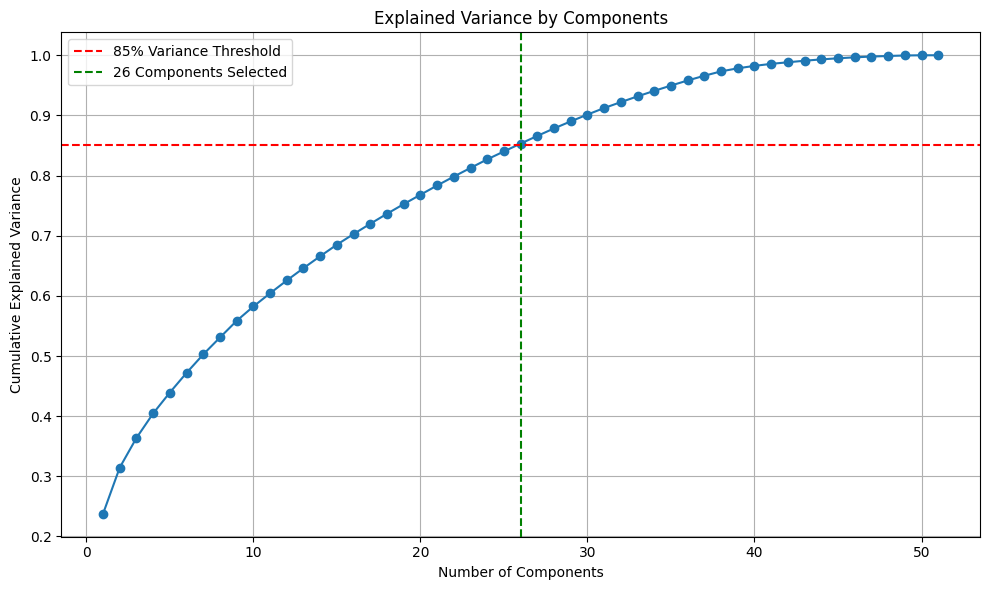

In [174]:
# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=explain_ratio, color='r', linestyle='--', label=f'{explain_ratio:.0%} Variance Threshold')
plt.axvline(x=n_components, color='g', linestyle='--', label=f'{n_components} Components Selected')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [175]:
# Perform PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [176]:
# Analyze feature contributions to principal components
print("\nTop feature contributions to principal components:")
component_names = [f"PC{i+1}" for i in range(n_components)]
loadings = pd.DataFrame(pca.components_.T, columns=component_names, index=X_prep.columns)


Top feature contributions to principal components:


In [177]:
# Show the top 5 contributing features for each principal component
for i, pc in enumerate(component_names):
    sorted_loadings = loadings[pc].abs().sort_values(ascending=False)
    print(f"\n{pc} explains {pca.explained_variance_ratio_[i]:.2%} of variance")
    print(f"Top contributing features:")
    for j, (feature, loading) in enumerate(sorted_loadings.head(5).items()):
        sign = '+' if loadings.loc[feature, pc] > 0 else '-'
        print(f"  {j+1}. {feature}: {sign}{abs(loadings.loc[feature, pc]):.3f}")


PC1 explains 23.77% of variance
Top contributing features:
  1. Asset_Index: +0.266
  2. Total Household Income: +0.258
  3. Housing and water Expenditure: +0.240
  4. Communication Expenditure: +0.225
  5. Transportation Expenditure: +0.216

PC2 explains 7.69% of variance
Top contributing features:
  1. Total Number of Family members: +0.354
  2. Members with age 5 - 17 years old: +0.335
  3. Total Food Ratio: +0.288
  4. Expenditure_to_Income_Ratio: +0.285
  5. Dependency_Ratio: +0.285

PC3 explains 4.92% of variance
Top contributing features:
  1. Housing and water Ratio: +0.340
  2. Expenditure_to_Income_Ratio: +0.313
  3. Total Number of Family members: -0.262
  4. Fruit Ratio: +0.244
  5. Total Food Ratio: +0.242

PC4 explains 4.08% of variance
Top contributing features:
  1. Restaurant and hotels Ratio: +0.463
  2. Restaurant and hotels Expenditure: +0.325
  3. Total Income from Entrepreneurial Acitivites: -0.254
  4. Transportation Ratio: +0.242
  5. Dependency_Ratio: -0.195



In [178]:
# Create a dataframe with the PCA results
X_pca_df = pd.DataFrame(X_pca, columns=component_names)

#Optimal Number of Clusters

In [179]:
# Calculate inertia (within-cluster sum of squares) for different numbers of clusters
inertia = []
silhouette_scores = []

max_clusters = 10
range_n_clusters = range(2, min(max_clusters + 1, len(X_pca)))

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_pca, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg:.3f}")

For n_clusters = 2, the silhouette score is 0.232
For n_clusters = 3, the silhouette score is 0.112
For n_clusters = 4, the silhouette score is 0.085
For n_clusters = 5, the silhouette score is 0.078
For n_clusters = 6, the silhouette score is 0.078
For n_clusters = 7, the silhouette score is 0.070
For n_clusters = 8, the silhouette score is 0.072
For n_clusters = 9, the silhouette score is 0.069
For n_clusters = 10, the silhouette score is 0.056


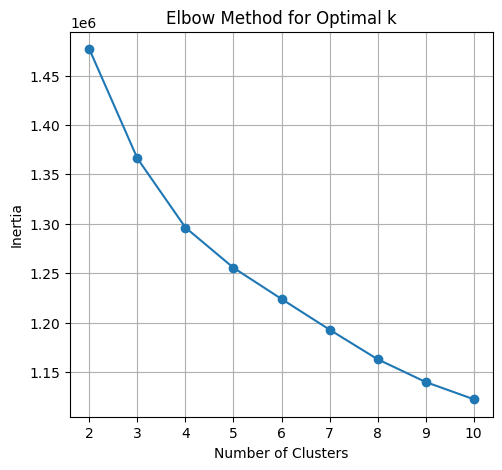

In [180]:
# Plot the elbow curve (inertia)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)

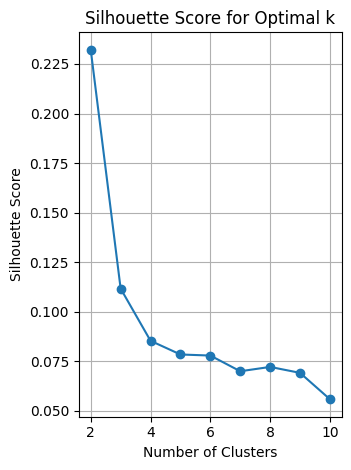

In [181]:
# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [182]:
# Find the optimal number of clusters based on silhouette score
optimal_clusters = range_n_clusters[np.argmax(silhouette_scores)]
max_silhouette = max(silhouette_scores)
print(f"\nOptimal number of clusters based on silhouette score: {optimal_clusters} (score: {max_silhouette:.3f})")


Optimal number of clusters based on silhouette score: 2 (score: 0.232)


#K Means Clustering

In [183]:
# Get unique regions
regions = df[region_column].unique()

# Initialize dictionary to store results
region_cluster_results = {}

# Main clustering on all data
kmeans_all = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
cluster_labels_all = kmeans_all.fit_predict(X_pca)

In [184]:
# Add cluster labels to original data
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = cluster_labels_all

# Calculate silhouette score for all data
silhouette_avg_all = silhouette_score(X_pca, cluster_labels_all)
print(f"Overall silhouette score: {silhouette_avg_all:.3f}")

Overall silhouette score: 0.232


In [185]:
# Add PCA dimensions to the dataframe for visualization
for col in X_pca_df.columns:
    df_with_clusters[col] = X_pca_df[col].values

In [186]:
# Store overall clustering results
region_cluster_results['All'] = {
    'kmeans': kmeans_all,
    'labels': cluster_labels_all,
    'silhouette': silhouette_avg_all,
    'data': df_with_clusters
}

In [187]:
# Perform clustering for each region separately
for region in regions:
    print(f"\nAnalyzing Region: {region}")

    # Filter data for this region
    region_mask = df[region_column] == region
    region_indices = np.where(region_mask)[0]

    if len(region_indices) < optimal_clusters:
        print(f"  Too few samples ({len(region_indices)}) for {optimal_clusters} clusters. Skipping.")
        continue

    X_pca_region = X_pca[region_indices]

    # Perform k-means clustering
    kmeans_region = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
    cluster_labels_region = kmeans_region.fit_predict(X_pca_region)

    # Calculate silhouette score
    if len(np.unique(cluster_labels_region)) > 1:  # Need at least 2 clusters for silhouette score
        silhouette_avg = silhouette_score(X_pca_region, cluster_labels_region)
        print(f"  Silhouette score: {silhouette_avg:.3f}")
    else:
        silhouette_avg = 0
        print("  Only one cluster found, silhouette score not applicable")

    # Store region-specific results
    region_cluster_results[region] = {
        'kmeans': kmeans_region,
        'labels': cluster_labels_region,
        'silhouette': silhouette_avg,
        'indices': region_indices
    }



Analyzing Region: CAR
  Silhouette score: 0.198

Analyzing Region: Caraga
  Silhouette score: 0.222

Analyzing Region: VI - Western Visayas
  Silhouette score: 0.265

Analyzing Region: V - Bicol Region
  Silhouette score: 0.236

Analyzing Region:  ARMM
  Silhouette score: 0.399

Analyzing Region: III - Central Luzon
  Silhouette score: 0.207

Analyzing Region: II - Cagayan Valley
  Silhouette score: 0.218

Analyzing Region: IVA - CALABARZON
  Silhouette score: 0.244

Analyzing Region: VII - Central Visayas
  Silhouette score: 0.243

Analyzing Region: X - Northern Mindanao
  Silhouette score: 0.275

Analyzing Region: XI - Davao Region
  Silhouette score: 0.270

Analyzing Region: VIII - Eastern Visayas
  Silhouette score: 0.247

Analyzing Region: I - Ilocos Region
  Silhouette score: 0.238

Analyzing Region: NCR
  Silhouette score: 0.280

Analyzing Region: IVB - MIMAROPA
  Silhouette score: 0.197

Analyzing Region: XII - SOCCSKSARGEN
  Silhouette score: 0.182

Analyzing Region: IX - Zas

#Cluster Analysis

In [188]:
# Cluster information
cluster_info = df_with_clusters.groupby('Cluster').agg({
    'Total Household Income': ['mean', 'median'],
    'Total Food Expenditure': ['mean', 'median'],
    'Region': lambda x: x.value_counts().index[0],  # Most common region
    'Household Head Age': 'mean',
    'Total Number of Family members': 'mean',
    'Total number of family members employed': 'mean'
})

print("\nCluster Information:")
print(cluster_info)


Cluster Information:
        Total Household Income           Total Food Expenditure            \
                          mean    median                   mean    median   
Cluster                                                                     
0                470003.080878  418997.0          131885.205933  122624.0   
1                143639.304335  129074.0           66750.499570   62292.0   

                   Region Household Head Age Total Number of Family members  \
                 <lambda>               mean                           mean   
Cluster                                                                       
0                     NCR          53.474560                       4.908415   
1        IVA - CALABARZON          50.599312                       4.533082   

        Total number of family members employed  
                                           mean  
Cluster                                          
0                                      1.56897

In [189]:
# Calculate cluster sizes and percentages
cluster_sizes = df_with_clusters['Cluster'].value_counts().sort_index()
cluster_percentages = cluster_sizes / len(df_with_clusters) * 100

print("\nCluster Sizes:")
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} households ({cluster_percentages[cluster]:.2f}%)")


Cluster Sizes:
Cluster 0: 11301 households (27.20%)
Cluster 1: 30243 households (72.80%)


In [190]:
# Visualize clusters in 2D PCA space
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

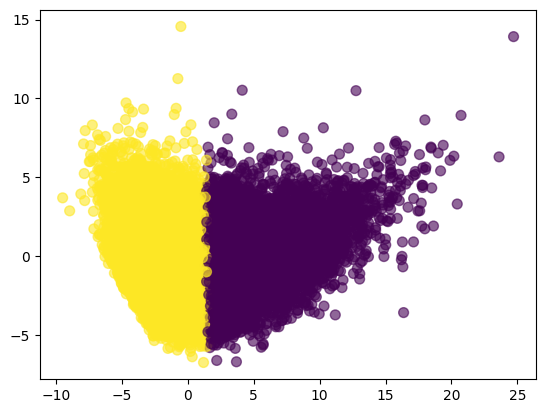

In [191]:
# Create scatter plot
scatter = plt.scatter(df_with_clusters['PC1'],
                     df_with_clusters['PC2'],
                     c=df_with_clusters['Cluster'],
                     cmap='viridis',
                     alpha=0.6,
                     s=50)

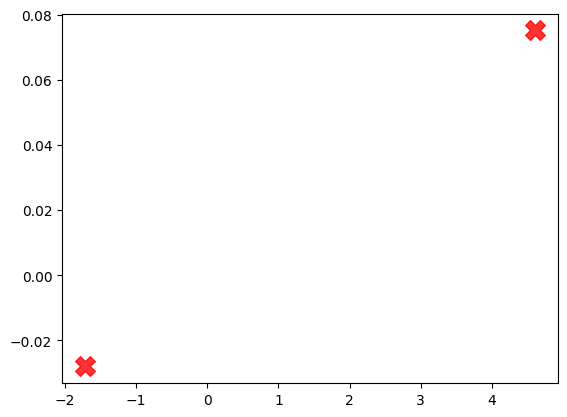

In [192]:
# Add cluster centers if we have the k-means model
centers = np.zeros((optimal_clusters, 2))
for i in range(optimal_clusters):
    # Get the mean PC values for each cluster
    centers[i, 0] = df_with_clusters[df_with_clusters['Cluster'] == i]['PC1'].mean()
    centers[i, 1] = df_with_clusters[df_with_clusters['Cluster'] == i]['PC2'].mean()

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8, marker='X')

<ipython-input-193-ae26c5cd8b02>:12: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 640x480 with 1 Axes> which fig.colorbar is called on.
  plt.colorbar(scatter, label='Cluster')


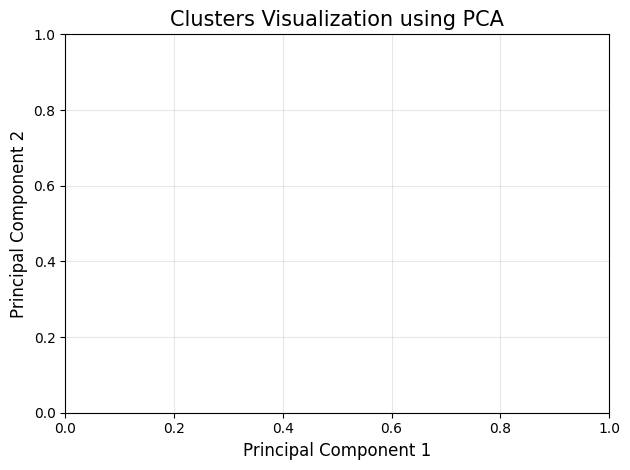

In [193]:
# Add cluster labels
for i, center in enumerate(centers):
    plt.annotate(f'Cluster {i}',
                (center[0], center[1]),
                fontsize=12,
                fontweight='bold',
                ha='center',
                va='center',
                backgroundcolor='white',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.8))

plt.colorbar(scatter, label='Cluster')
plt.title('Clusters Visualization using PCA', fontsize=15)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

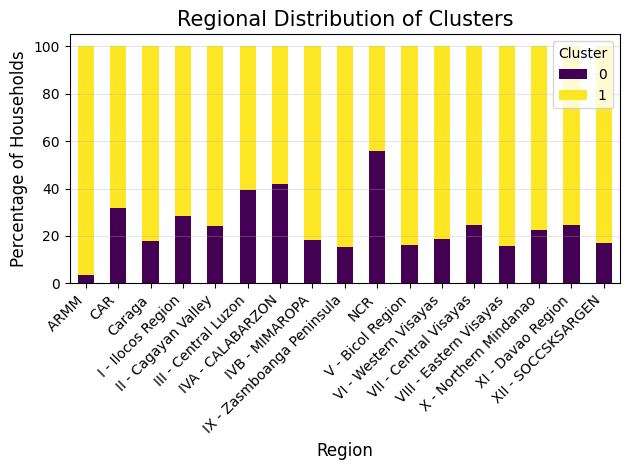

In [194]:
# Regional distribution of clusters
region_cluster_distribution = pd.crosstab(
    df_with_clusters['Region'],
    df_with_clusters['Cluster'],
    normalize='index'
) * 100

plt.figure(figsize=(14, 8))
region_cluster_distribution.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Regional Distribution of Clusters', fontsize=15)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Percentage of Households', fontsize=12)
plt.legend(title='Cluster')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [195]:
# Compare key socioeconomic indicators across clusters
key_indicators = [
    'Total Household Income',
    'Total Food Expenditure',
    'Housing and water Expenditure',
    'Education Expenditure',
    'Transportation Expenditure',
    'Total Number of Family members',
    'Total number of family members employed',
    'Asset_Index'
]

# Filter for indicators that exist in the dataframe
key_indicators = [col for col in key_indicators if col in df_with_clusters.columns]

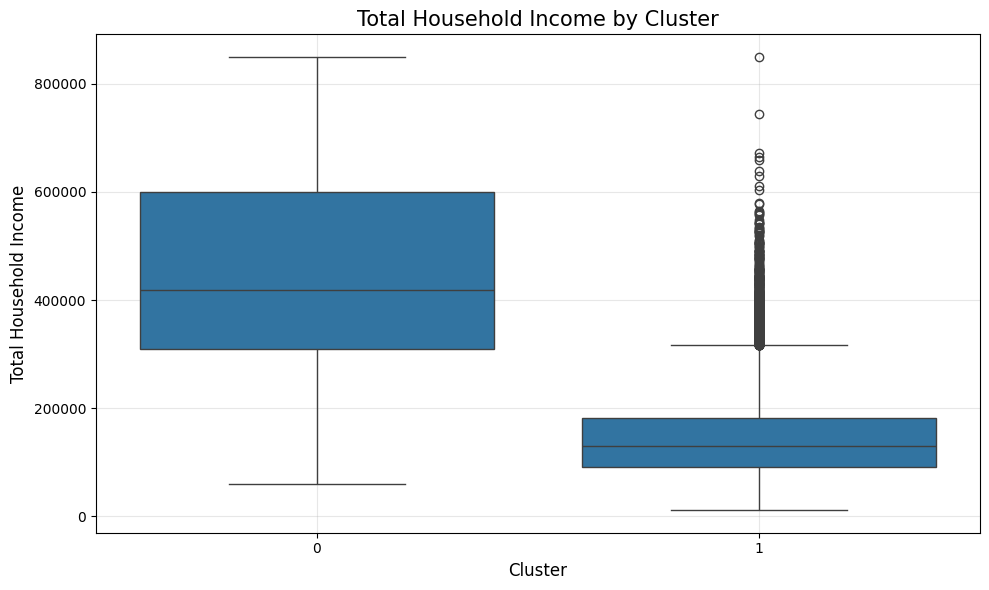

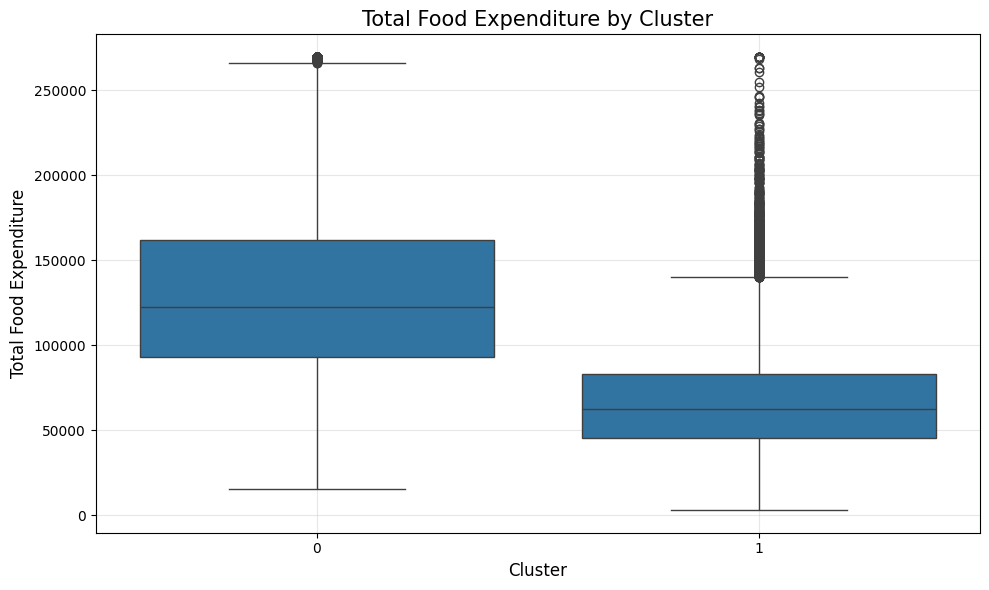

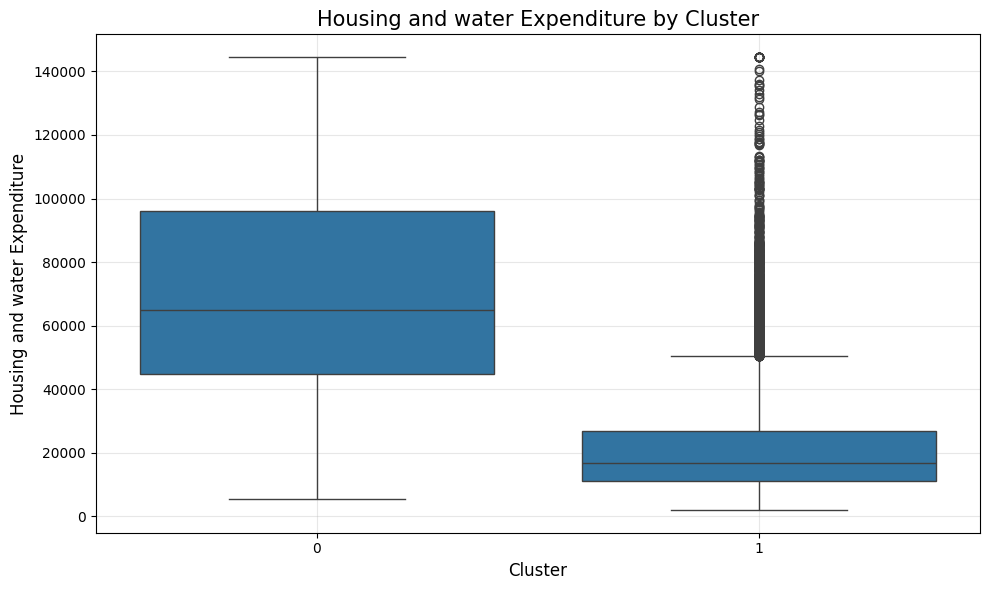

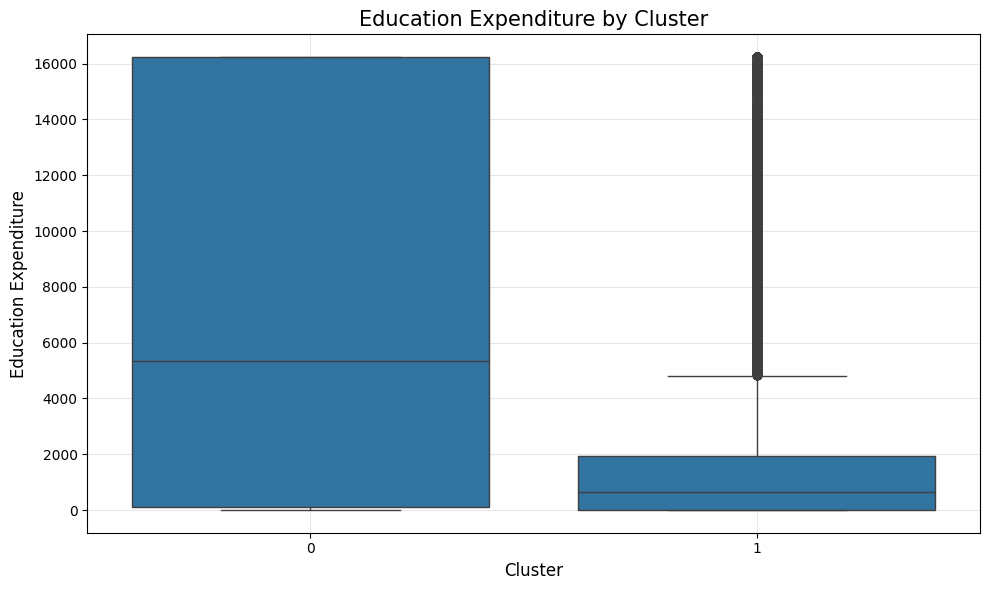

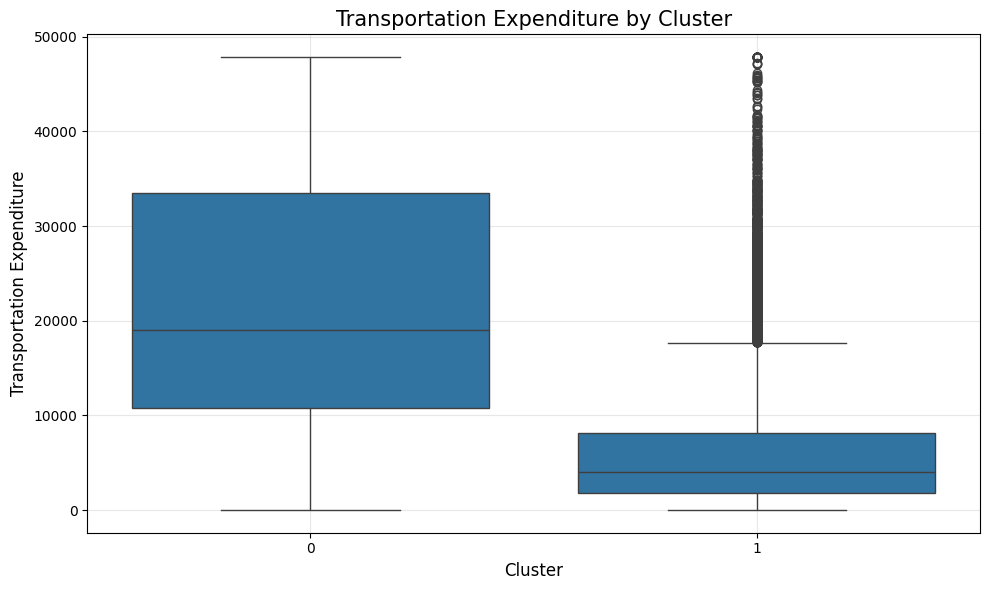

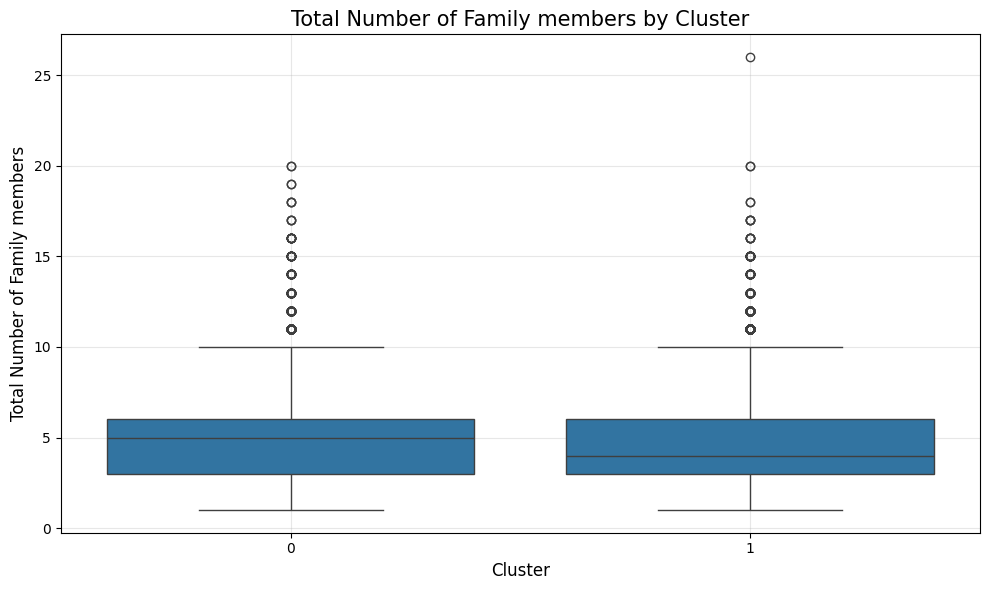

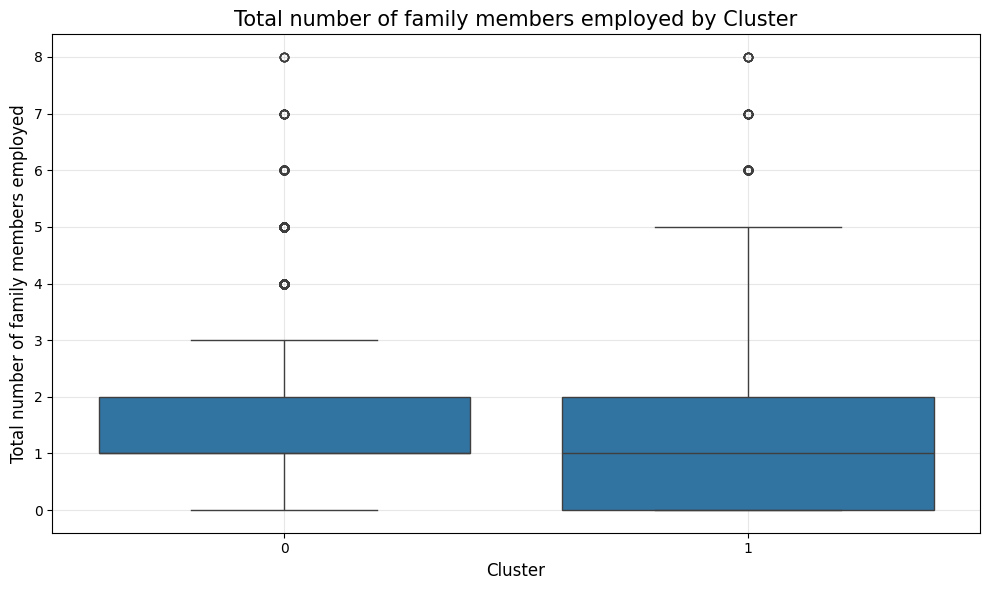

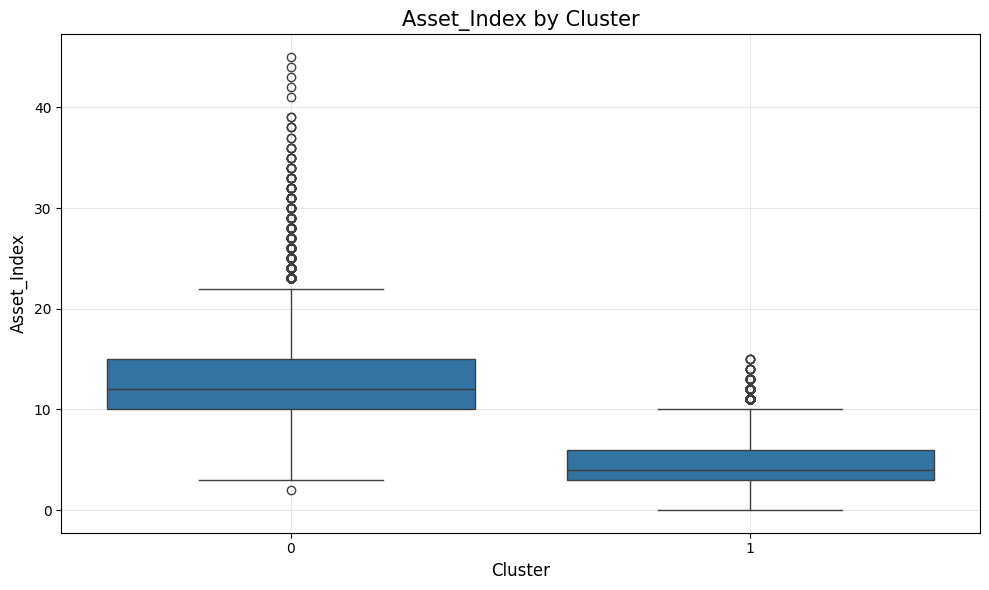

In [196]:
# Create box plots for key indicators across clusters
for indicator in key_indicators:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=indicator, data=df_with_clusters)
    plt.title(f'{indicator} by Cluster', fontsize=15)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(indicator, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [197]:
# Calculate detailed cluster profiles
profile_features = key_indicators + ['Household Head Age', 'Members with age less than 5 year old']
profile_features = [col for col in profile_features if col in df_with_clusters.columns]

cluster_profiles = df_with_clusters.groupby('Cluster')[profile_features].agg([
    'mean', 'median', 'std', 'min', 'max'
])

print("\nDetailed Cluster Profiles:")
print(cluster_profiles)


Detailed Cluster Profiles:
        Total Household Income                                          \
                          mean    median            std    min     max   
Cluster                                                                  
0                470003.080878  418997.0  202384.829034  58958  849869   
1                143639.304335  129074.0   74228.012232  11285  849869   

        Total Food Expenditure                                              \
                          mean    median           std      min        max   
Cluster                                                                      
0                131885.205933  122624.0  54051.674888  15195.0  269490.25   
1                 66750.499570   62292.0  30802.149269   2947.0  269490.25   

         ... Household Head Age                            \
         ...               mean median        std min max   
Cluster  ...                                                
0        ...          53.47

In [198]:
# Create a summary of cluster characteristics
cluster_summary = {}

for cluster in range(optimal_clusters):
    cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster]

    # Calculate key metrics
    avg_income = cluster_data['Total Household Income'].mean()
    avg_food_exp = cluster_data['Total Food Expenditure'].mean() if 'Total Food Expenditure' in cluster_data.columns else 0
    avg_family_size = cluster_data['Total Number of Family members'].mean() if 'Total Number of Family members' in cluster_data.columns else 0

    # Get top regions
    top_regions = cluster_data['Region'].value_counts().head(3)
    region_percentage = (top_regions / len(cluster_data) * 100).round(1)
    region_str = ', '.join([f"{region} ({pct}%)" for region, pct in zip(top_regions.index, region_percentage)])

    # Create a descriptive summary
    if 'Asset_Index' in cluster_data.columns:
        asset_index = cluster_data['Asset_Index'].mean()
        income_percentile = np.percentile(df_with_clusters['Total Household Income'], [25, 50, 75])

        if avg_income < income_percentile[0]:
            economic_status = "Low-income"
        elif avg_income < income_percentile[1]:
            economic_status = "Lower-middle income"
        elif avg_income < income_percentile[2]:
            economic_status = "Upper-middle income"
        else:
            economic_status = "High-income"

        cluster_summary[cluster] = {
            'size': len(cluster_data),
            'percentage': len(cluster_data) / len(df_with_clusters) * 100,
            'avg_income': avg_income,
            'avg_food_exp': avg_food_exp,
            'avg_family_size': avg_family_size,
            'asset_index': asset_index,
            'economic_status': economic_status,
            'regions': region_str
        }


In [199]:
# Print the cluster characterizations
print("\nCluster Characterization:")
for cluster, summary in cluster_summary.items():
    print(f"\nCluster {cluster} - {summary['economic_status']} households")
    print(f"  Size: {summary['size']} households ({summary['percentage']:.1f}% of total)")
    print(f"  Avg Income: ₱{summary['avg_income']:,.2f}")
    print(f"  Avg Food Expenditure: ₱{summary['avg_food_exp']:,.2f}")
    print(f"  Avg Family Size: {summary['avg_family_size']:.1f} members")
    print(f"  Avg Asset Index: {summary['asset_index']:.1f}")
    print(f"  Top Regions: {summary['regions']}")

print("\n=== Analysis Complete ===")
print(f"Identified {optimal_clusters} distinct socioeconomic clusters across Philippine regions")


Cluster Characterization:

Cluster 0 - High-income households
  Size: 11301 households (27.2% of total)
  Avg Income: ₱470,003.08
  Avg Food Expenditure: ₱131,885.21
  Avg Family Size: 4.9 members
  Avg Asset Index: 13.2
  Top Regions: NCR (20.5%), IVA - CALABARZON (15.4%), III - Central Luzon (11.3%)

Cluster 1 - Lower-middle income households
  Size: 30243 households (72.8% of total)
  Avg Income: ₱143,639.30
  Avg Food Expenditure: ₱66,750.50
  Avg Family Size: 4.5 members
  Avg Asset Index: 4.5
  Top Regions: IVA - CALABARZON (8.0%), VI - Western Visayas (7.6%),  ARMM (7.2%)

=== Analysis Complete ===
Identified 2 distinct socioeconomic clusters across Philippine regions
